# Unemployment Consistency Test

### Import libraries

In [3]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../scr/')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *


 ### Feature Numbers and Model Types

In [4]:
feature_numbers = ['9', '22', '30']   
model_types = ['LP','RP']  

### Load CSV files

In [5]:
df_predictions = load_and_clean_predictions('unemployment','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/unemployment_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/unemployment_predictions_9RP_nodate.csv for model 9RP
Loaded file: ../predictions/unemployment_predictions_22LP_nodate.csv for model 22LP
Loaded file: ../predictions/unemployment_predictions_22RP_1128_0647.csv for model 22RP
Loaded file: ../predictions/unemployment_predictions_30LP_nodate.csv for model 30LP
Loaded file: ../predictions/unemployment_predictions_30RP_nodate.csv for model 30RP


### Absolute Differences

In [7]:
abs_diff = {model_type: {} for model_type in model_types}
for model_type in model_types:
    suffix = 'LM' if model_type == 'LP' else 'RM'

    substring_1_9vs30 = f'9{suffix}'  
    substring_2_9vs30 = f'30{suffix}'  
    substring_1_22vs30 = f'22{suffix}'  
    substring_2_22vs30 = f'30{suffix}' 

    abs_diff[model_type]['abs_diff_9vs30'] = compute_absolute_difference(
            df_predictions['9'][model_type], 
            df_predictions['30'][model_type],
            substring_1=substring_1_9vs30, 
            substring_2=substring_2_9vs30
        )
    
    abs_diff[model_type]['abs_diff_22vs30'] = compute_absolute_difference(
            df_predictions['22'][model_type], 
            df_predictions['30'][model_type],
            substring_1=substring_1_22vs30, 
            substring_2=substring_2_22vs30
        )

In [ ]:
#abs_diff['RP']['abs_diff_9vs20']

### Computation of Row-wise and Combined Standard Deviations of Absolute Differences

In [8]:
std_results = {model_type: {} for model_type in model_types}
std_all_results = {model_type: {} for model_type in model_types}

for model_type in model_types:
    for comparison in ['9vs30', '22vs30']:
        std_results[model_type][comparison] = abs_diff[model_type][f'abs_diff_{comparison}'].iloc[:, 1:].apply(
            lambda row: row.std(skipna=True), axis=1
        )

        data = abs_diff[model_type][f'abs_diff_{comparison}'].iloc[:, 1:]
        all_values = data.values.flatten()
        all_values = all_values[~np.isnan(all_values)]
        std_all_results[model_type][comparison] = np.std(all_values)

for model_type, results in std_all_results.items():
    for comparison, std_value in results.items():
        print(f"Combined STD for model type {model_type}, {comparison}: {std_value}")


Combined STD for model type LP, 9vs30: 0.03841373348131868
Combined STD for model type LP, 22vs30: 0.04078096033954176
Combined STD for model type RP, 9vs30: 0.13160941947286334
Combined STD for model type RP, 22vs30: 0.12448430711298679


### Visualization for Consistency Test

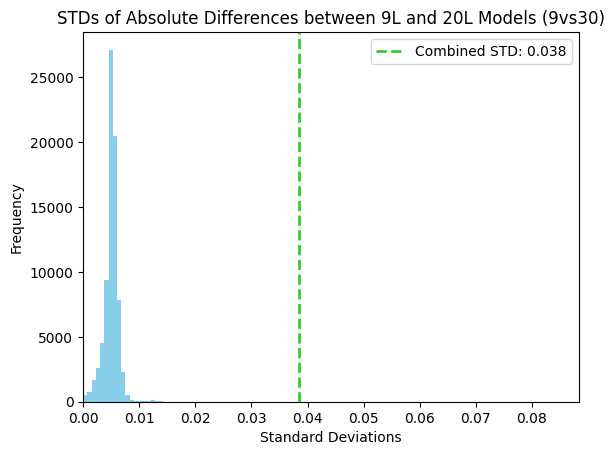

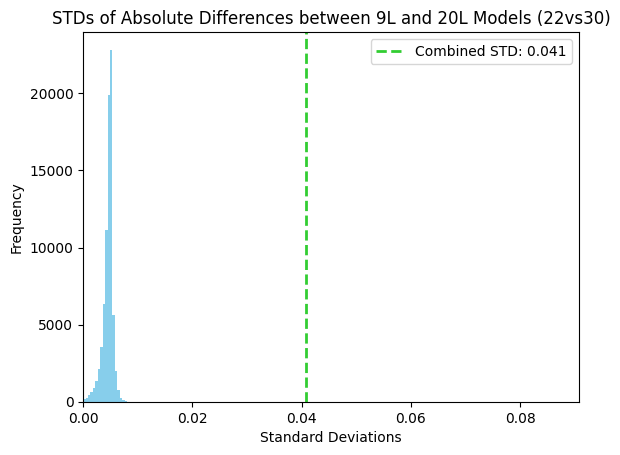

In [13]:
for comparison in ['9vs30', '22vs30']:
    plot_std_histogram(
        std_results['LP'][comparison],  
        std_all_results['LP'][comparison],  
        f'STDs of Absolute Differences between 9L and 20L Models ({comparison})')

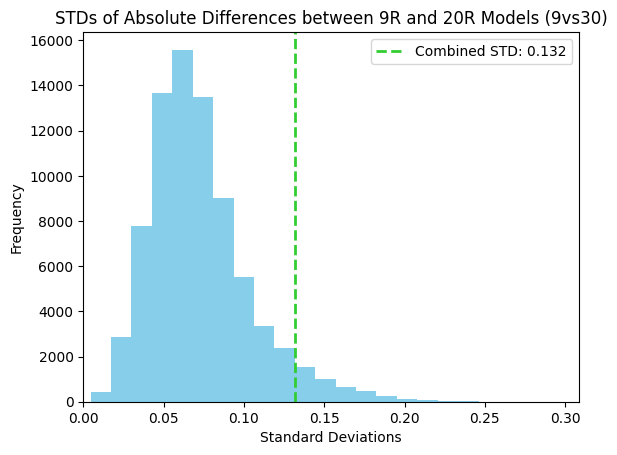

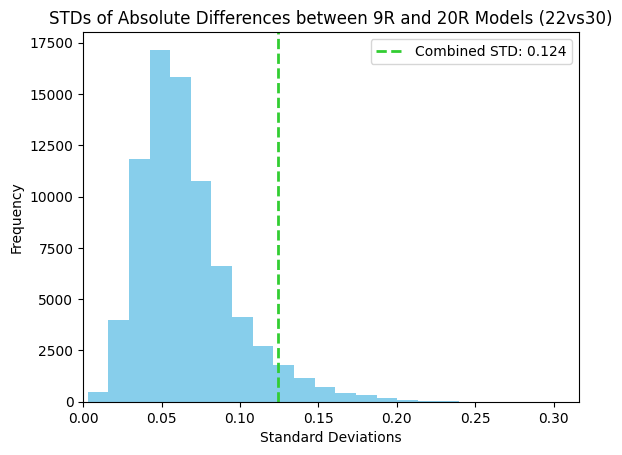

In [14]:
for comparison in ['9vs30', '22vs30']:
    plot_std_histogram(
        std_results['RP'][comparison],  
        std_all_results['RP'][comparison],  
        f'STDs of Absolute Differences between 9R and 20R Models ({comparison})')